In [1]:
## Add Library
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
from tensorflow.keras import datasets,layers,models
from tensorflow.keras.optimizers import SGD,RMSprop,Adam
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
data = '/content/drive/MyDrive/hoa/'

In [4]:
image_size = (150,150)
TRAINING_DATA_DIR = str(data)
print(TRAINING_DATA_DIR)

kwargs_datagen = dict(rescale=1./255, validation_split=0.2) # 20 percent for validation

valid_datagen = ImageDataGenerator(**kwargs_datagen)
valid_generator = valid_datagen.flow_from_directory(TRAINING_DATA_DIR, subset="validation", shuffle=True, target_size=image_size)

## Train data modify
train_datagen = ImageDataGenerator(**kwargs_datagen)
train_generator = train_datagen.flow_from_directory(TRAINING_DATA_DIR,subset="training",shuffle=True,target_size=image_size)

/content/drive/MyDrive/hoa/
Found 15 images belonging to 4 classes.
Found 68 images belonging to 4 classes.


In [5]:
## Labels and match class
image_batch_train, label_batch_train = next(iter(train_generator))
print("image batch shape: ", image_batch_train.shape)
print("label batch shape: ", label_batch_train.shape)
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print("labels: ", dataset_labels)
print("match class: ", train_generator.class_indices)

image batch shape:  (32, 150, 150, 3)
label batch shape:  (32, 4)
labels:  ['Hoacuc' 'Mattroi' 'Thuocduoc' 'Vantho']
match class:  {'hoacuc': 0, 'mattroi': 1, 'thuocduoc': 2, 'vantho': 3}


In [7]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same')) 
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same')) 
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same')) 
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same')) 
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(128,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

#Training
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
history=model.fit(train_generator,epochs=100,batch_size=4,validation_data=valid_generator,steps_per_epoch=steps_per_epoch,verbose=1)

# Save model
model.save('hoa.h5')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

Sai so:  1.169801180367358e-05
Do chinh xac:  1.0


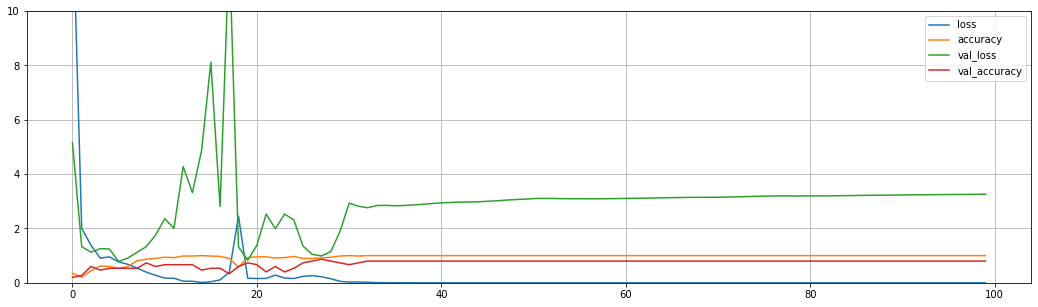

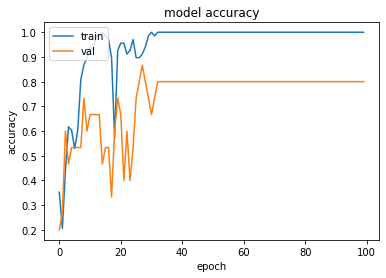

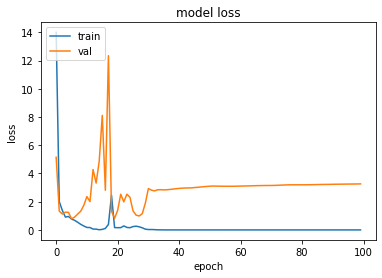

In [8]:
score = model.evaluate(train_generator, verbose = 0)
print('Sai so: ', score[0])
print('Do chinh xac: ', score[1])

## Diagram
pd.DataFrame(history.history).plot(figsize = (18,5))
plt.grid(True)
plt.gca().set_ylim(0,10)
plt.show()
## Model accurary
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()
## Model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

hoa cuc


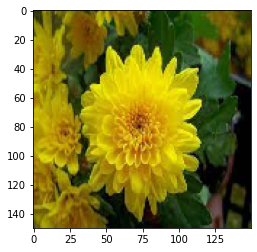

In [11]:
## Testing code with ANN model
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models
from keras.preprocessing import image
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array 
import numpy as np
## Load and define image - to test
img = load_img('download.jpg', target_size=(150,150))
plt.imshow(img)
img=image.img_to_array(img) 
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
## Result
guess=np.argmax(model.predict(img),axis=1)
if guess[0]==0:
  print("hoa cuc")
if guess[0]==1:
  print("mat troi")
if guess[0]==2:
  print("thuoc duoc")
if guess[0]==3:
  print("van tho")
